# 风格转换演示

## 加载模型
加载已经训练好的模型

In [3]:
import tensorflow as tf

def load_graph(filename):
    with tf.gfile.GFile(filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    with tf.Graph().as_default() as graph:
        prefix_name = ""
        tf.import_graph_def(graph_def, name = prefix_name)
    return graph
graph = load_graph('/notebooks/GDD/data/stylize_quantized.pb')

## 使用模型
获取模型的输入输出节点，运行模型

In [4]:
def stylish(image_data, style_weight):
    input_node = graph.get_tensor_by_name('input:0')
    style_node = graph.get_tensor_by_name('style_num:0')
    output_node = graph.get_tensor_by_name('transformer/expand/conv3/conv/Sigmoid:0')

    image_data = image_data.reshape(((1,) + image_data.shape))
    with tf.Session(graph = graph) as sess:
        output = sess.run(output_node, feed_dict={
            input_node : image_data,
            style_node : style_weight
        })
    return output.reshape(output.shape[1:])

## 准备数据并运行

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def read_image(filename, resize_wh = 256):
    pilImage = Image.open(filename)
    pilImage = pilImage.resize((resize_wh, resize_wh), Image.ANTIALIAS)
    image = np.asarray(pilImage)
    image = image / 255.0
    return image

def get_style_weight(index):
    style = np.zeros(26)
    style[index] = 1
    return style

def display_image(image, style_image, output_image):
    plt.figure(figsize=(100, 300))
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(style_image)
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(output_image)
    plt.axis('off')
    plt.show()

def demo(image_file, style_index):
    image = read_image(image_file)
    style_image = read_image('/notebooks/GDD/data/styles/style%d.jpg' % style_index)
    style = get_style_weight(style_index)
    output = stylish(image, style)
    display_image(image, style_image, output)

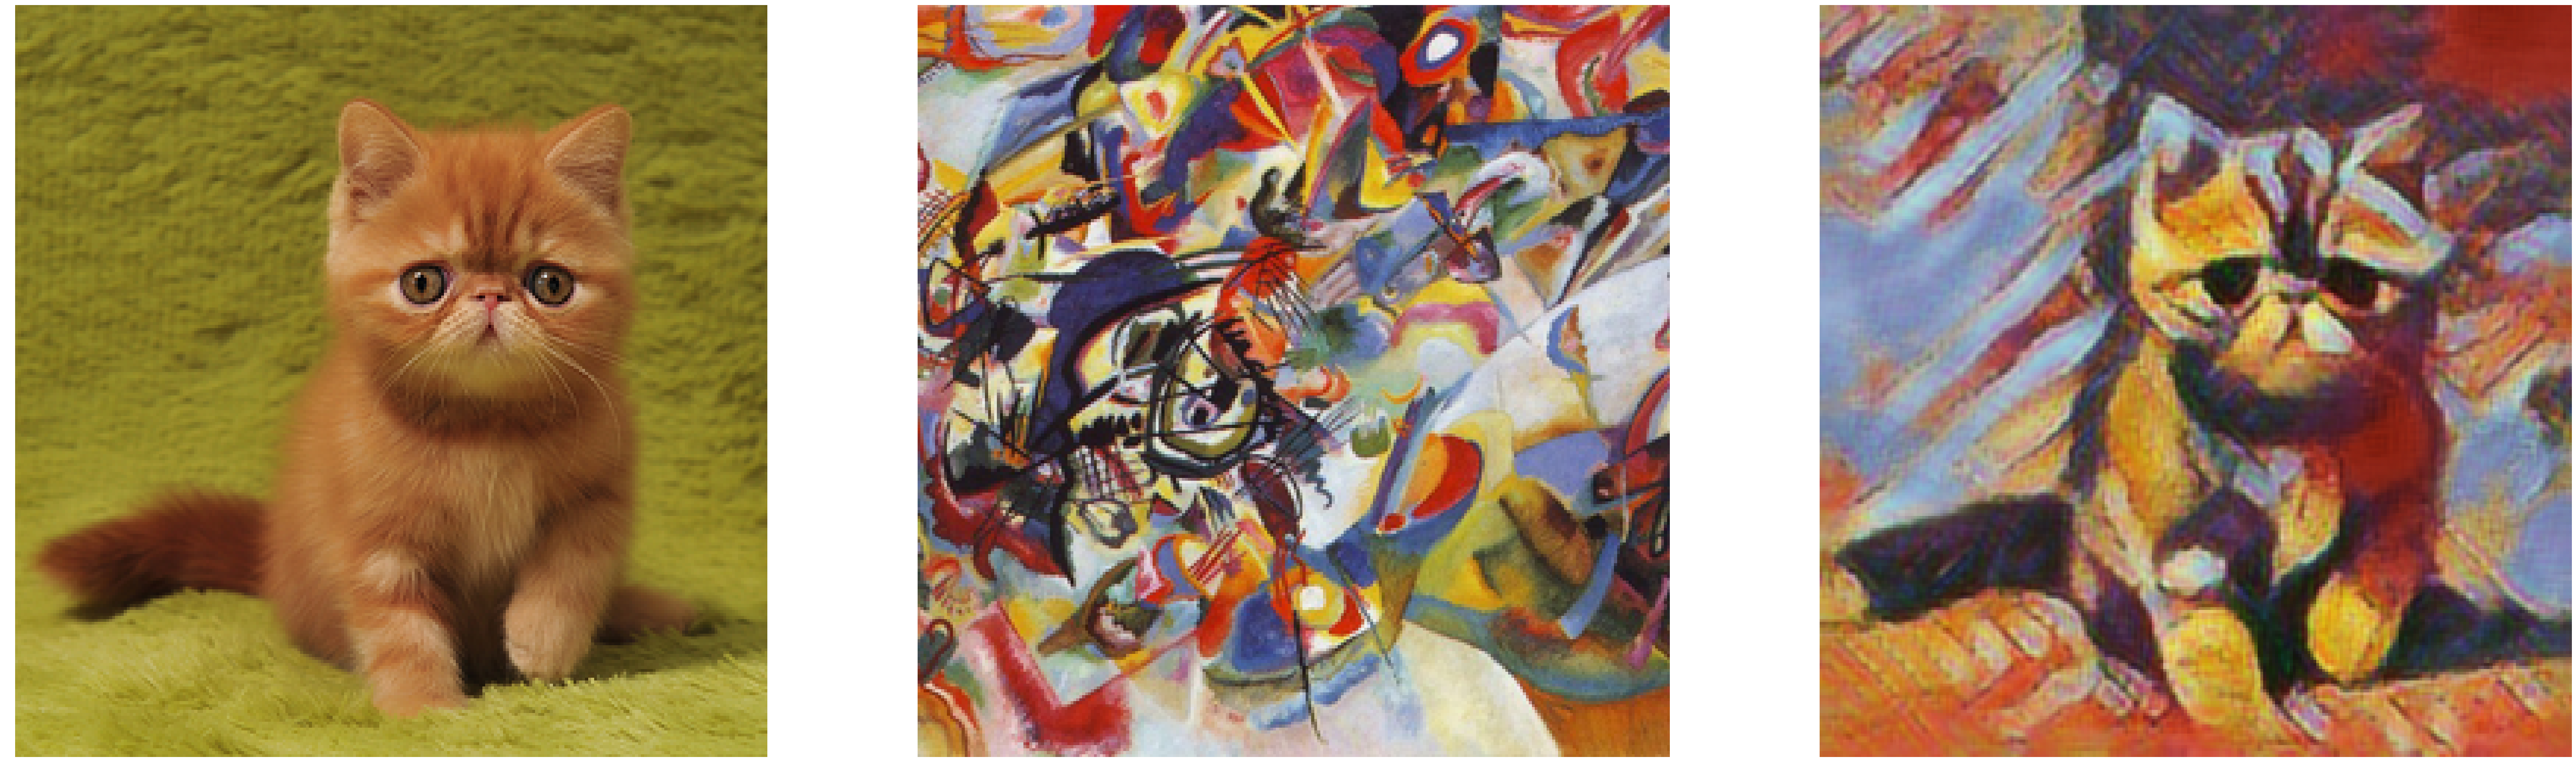

In [7]:
demo(
    image_file = '/notebooks/GDD/data/demo1.jpg',
    style_index = 5)